# 1. Install and import dependencies

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt 

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\HOME/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-12 Python-3.12.2 torch-2.2.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections

In [9]:
img = 'https://imgs.search.brave.com/MH9CJO4Vv5YoCjB1no8YuezU4SFdedFYzx7NQENP6RA/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMudW5zcGxhc2gu/Y29tL3Bob3RvLTE2/MDA3OTI2ODg3MjQt/MWY2YWEyNjIwYWIy/P3E9ODAmdz0xMDAw/JmF1dG89Zm9ybWF0/JmZpdD1jcm9wJml4/bGliPXJiLTQuMC4z/Jml4aWQ9TTN3eE1q/QTNmREI4TUh4elpX/RnlZMmg4TVRWOGZH/TmhjaVV5TUhSeVlX/Wm1hV044Wlc1OE1I/eDhNSHg4ZkRBPQ'

In [10]:
results = model(img)
results.print()

image 1/1: 1287x860 18 persons, 14 cars, 26 motorcycles, 1 bus, 3 trucks, 1 traffic light
Speed: 755.2ms pre-process, 463.3ms inference, 20.0ms NMS per image at shape (1, 3, 640, 448)


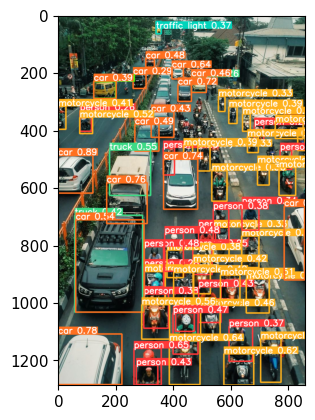

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

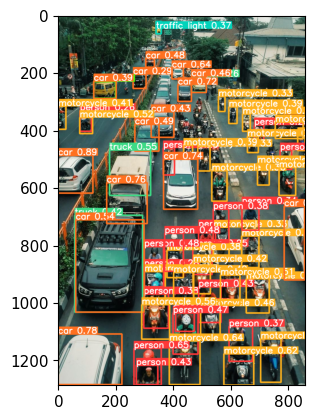

In [12]:
plt.imshow(np.squeeze(results.render()))

# 4. Real Time Detections

In [13]:
cap = cv2.VideoCapture('VID-20240121-WA0059.mp4')
while cap.isOpened():
    ret,frame = cap.read()

    results = model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [14]:
import uuid
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs = 20

In [16]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.5696f70d-e5fd-11ee-a04c-a6998de6dfcc.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.5699ddb9-e5fd-11ee-be59-a6998de6dfcc.jpg
data\images\awake.5699ddba-e5fd-11ee-b1da-a6998de6dfcc.jpg
data\images\awake.5699ddbb-e5fd-11ee-b955-a6998de6dfcc.jpg
data\images\awake.5699ddbc-e5fd-11ee-8852-a6998de6dfcc.jpg
data\images\awake.5699ddbd-e5fd-11ee-9dc1-a6998de6dfcc.jpg
data\images\awake.5699ddbe-e5fd-11ee-a13b-a6998de6dfcc.jpg
data\images\awake.5699ddbf-e5fd-11ee-a153-a6998de6dfcc.jpg
data\images\awake.5699ddc0-e5fd-11ee-924f-a6998de6dfcc.jpg
data\images\awake.5699ddc1-e5fd-11ee-9030-a6998de6dfcc.jpg
data\images\awake.5699ddc2-e5fd-11ee-a638-a6998de6dfcc.jpg
data\images\awake.5699ddc3-e5fd-11ee-a7a4-a6998de6dfcc.jpg
data\images\awake.569a04ce-e5fd-11ee-a978-a6998de6dfcc.jpg
data\images\awake.569a04cf-e5fd-11ee-85f2-a6998de6dfcc.jpg
data\images\awake.569a04d0-e5fd-11ee-a257-a6998de6dfcc.jpg
data\images\awake.569a04d1-e5fd-11ee-a575-a6998de6dfcc.jpg
data\images\awake.569a04d2-e5fd-11ee-b0c6-a6998de6dfcc.jpg
data\images\awake.569a04d3-e5fd-11ee-bed9-a6998de6dfcc.j

In [19]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'drowsy.3dc0a4a4-e074-11ee-bf7d-a2d5294d61e4.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()